In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf
from datetime import date
current_date = date.today()
start = '2010-01-01'
end = current_date

df = yf.download('^NSEI',start=start,end=end)
df.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2025-01-22,23155.349609,23169.550781,22981.300781,23099.150391,276000
2025-01-23,23205.349609,23270.800781,23090.650391,23128.300781,275600
2025-01-24,23092.199219,23347.300781,23050.000000,23183.900391,264300
2025-01-27,22829.150391,23007.449219,22786.900391,22940.150391,257400
2025-01-28,22957.250000,23137.949219,22857.650391,22960.449219,361900


In [3]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
0,2010-01-04,5232.200195,5238.450195,5167.100098,5200.899902,0
1,2010-01-05,5277.899902,5288.350098,5242.399902,5277.149902,0
2,2010-01-06,5281.799805,5310.850098,5260.049805,5278.149902,0
3,2010-01-07,5263.100098,5302.549805,5244.750000,5281.799805,0
4,2010-01-08,5244.750000,5276.750000,5234.700195,5264.250000,0


In [4]:
df = df.drop(columns=['Date'],axis=1)
df.head()

/var/folders/44/8qf5tgj558v7tbx0cl8zhcxh0000gn/T/ipykernel_23967/808947053.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns=['Date'],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
0,5232.200195,5238.450195,5167.100098,5200.899902,0
1,5277.899902,5288.350098,5242.399902,5277.149902,0
2,5281.799805,5310.850098,5260.049805,5278.149902,0
3,5263.100098,5302.549805,5244.750000,5281.799805,0
4,5244.750000,5276.750000,5234.700195,5264.250000,0


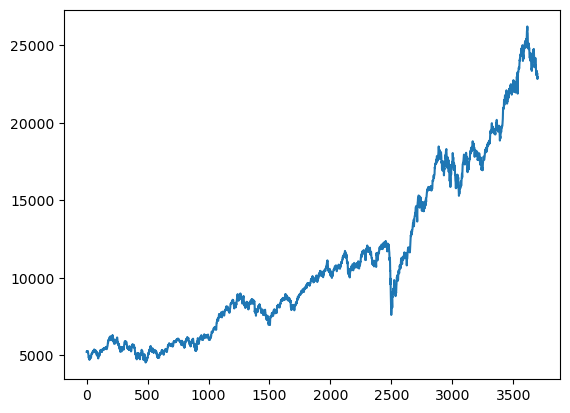

In [5]:
plt.plot(df.Close)

In [6]:
ma100 = df.Close.rolling(100).mean()

In [7]:
ma100

Ticker,^NSEI
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3695,24450.052031
3696,24429.746523
3697,24407.881523
3698,24383.374531


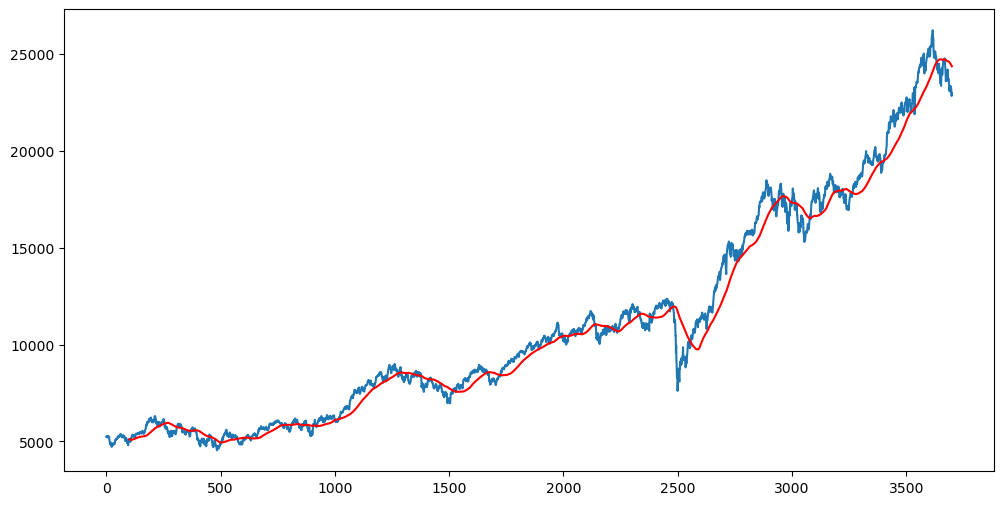

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200 = df.Close.rolling(200).mean()

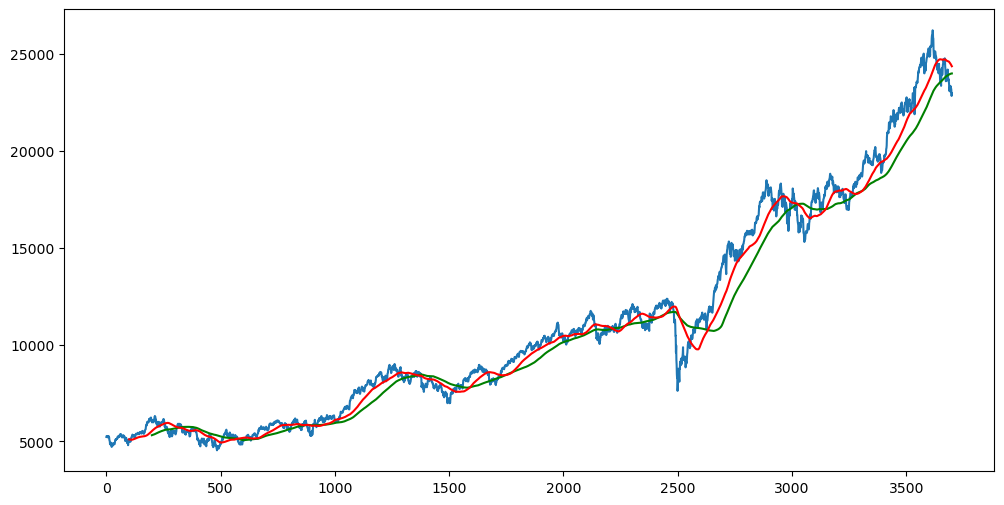

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')

In [11]:
df.shape

(3700, 5)

In [12]:
# Splitting data
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2590, 1)
(1110, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
print(data_training_array.shape)

(2590, 1)


In [15]:
x_train = []
y_train = []

for i in range (100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [101]:
model = Sequential()

model.add(LSTM(units=50, activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [102]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.0806
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0099
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 0.0080
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 0.0074
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 0.0082
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0070
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.0066
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0067
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0054
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0052
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0055
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.0055
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0045
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0048
Epoch 15/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - los

In [104]:
model.save('stock_pred.h5')

In [190]:
past_100_days = data_training.tail(100)

In [191]:
final_df = pd.concat([past_100_days,data_testing],ignore_index=True)

In [192]:
final_df

Ticker,^NSEI
0,11303.299805
1,11251.000000
2,11269.000000
3,10989.450195
4,10451.450195
...,...
1204,23213.199219
1205,23311.800781
1206,23203.199219
1207,23344.750000


In [193]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.19848916],
       [0.19567822],
       [0.19664566],
       ...,
       [0.83806923],
       [0.84567712],
       [0.82847283]])

In [194]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [195]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1109, 100, 1)
(1109,)


In [196]:
y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [197]:
y_pred.shape

(1109, 1)

In [198]:
print(scaler.scale_)
print(y_pred.shape)

[5.37466789e-05]
(1109, 1)


In [199]:
scale_factor = 1/0.00012791
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

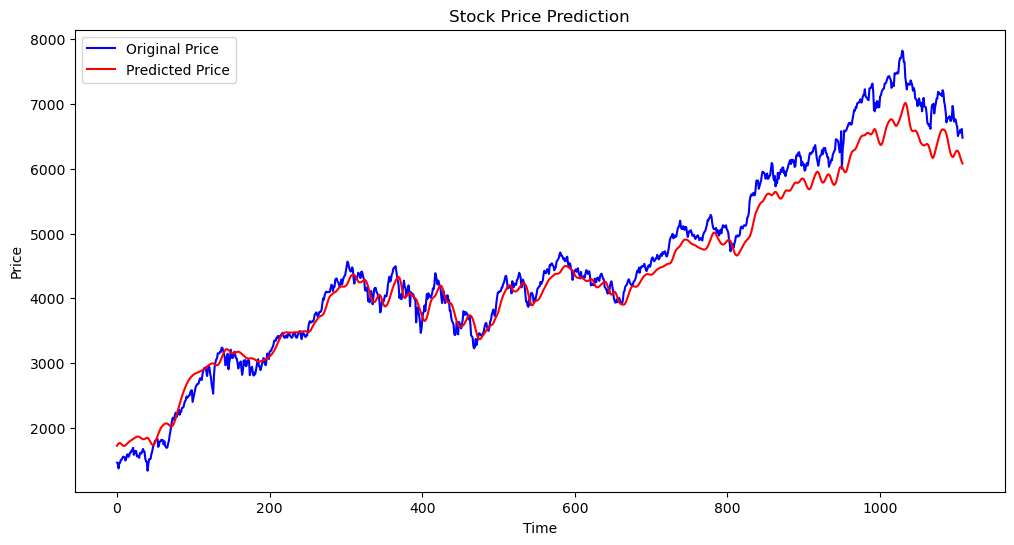

In [200]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')  # Test data (actual prices)
plt.plot(y_pred, 'r', label='Predicted Price')  # Predicted prices
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()


In [203]:
import joblib

joblib.dump(model,'stock_pred_model.pkl')

['stock_pred_model.pkl']